In [2]:
import datetime
import pandas as pd
from panda import load_pc, add_cat
pc = load_pc()
pc = add_cat(pc)
pc.columns

Index(['account', 'book_date', 'valuta_date', 'party', 'book_text', 'purpose',
       'amount', 'balance', 'transfer_category', 'cat'],
      dtype='object')

In [6]:
## Finden von nicht-kategorisierten Abbuchungen auf den Konten 'giro', 'gesa' und 'common' im Jahr 2024

# Kopie des DataFrames erstellen
df = pc.loc[(pc.book_date.dt.year == 2024) & (pc.transfer_category.isna())]
df = df.copy()

# 'amount_type' setzen basierend auf dem Betrag
df.loc[df['amount'] > 0, 'amount_type'] = 'Gutschrift'
df.loc[df['amount'] <= 0, 'amount_type'] = 'Abbuchung'

# Relevante Spalten auswählen
cols = ['account', 'book_date', 'party', 'purpose', 'amount', 'cat']

# Filter für Abbuchungen und die Konten 'giro' und 'common'
df = df.loc[
    (df['amount_type'] == 'Abbuchung') & (df['account'].isin(['giro', 'gesa', 'common']))
    ][cols].sort_values(by='amount', ascending=True)

# Nur Einträge ohne Kategorie anzeigen
filtered_df = df.loc[df['cat'].isna()]
print(filtered_df['amount'].sum())
filtered_df

-37487.850000000006


,account,book_date,party,purpose,amount,cat
6880,gesa,2024-06-04,VISA AVOCADO STORE GMBH,NR XXXX 5021 HAMBURG DE KAUFUMSATZ 02.06 1402....,-1402.69,NaN
6408,gesa,2024-04-09,VISA SCHUHHAUS POTTHOFF,NR XXXX 5021 GUETERSLOH KAUFUMSATZ 05.04 14440...,-514.34,NaN
6640,gesa,2024-05-07,PayPal Europe S.a.r.l. et Cie S.C.A,"1034161056724/PP.7941.PP/. DB Vertr ieb GmbH, ...",-492.10,NaN
6089,gesa,2024-02-22,Waschbaer GmbH,K. 040240021 A. 102346415,-426.44,NaN
6642,gesa,2024-05-07,VISA APOTHEKE AM VIKT-LUISE,NR XXXX 5021 BERLIN KAUFUMSATZ 04.05 094907 AR...,-402.76,NaN
...,...,...,...,...,...,...
6333,gesa,2024-03-28,NaN,NaN,-0.06,NaN
7511,gesa,2024-08-20,VISA PARKERING KBH NV-R,VISA 4546 XXXX XXXX 5021 AUSLANDSEINSATZENTGEL...,-0.04,NaN
7539,gesa,2024-08-23,VISA JONES KOEKSHOERNA AB,VISA 4546 XXXX XXXX 5021 AUSLANDSEINSATZENTGEL...,-0.04,NaN
6327,common,2024-03-28,NaN,NaN,-0.03,NaN


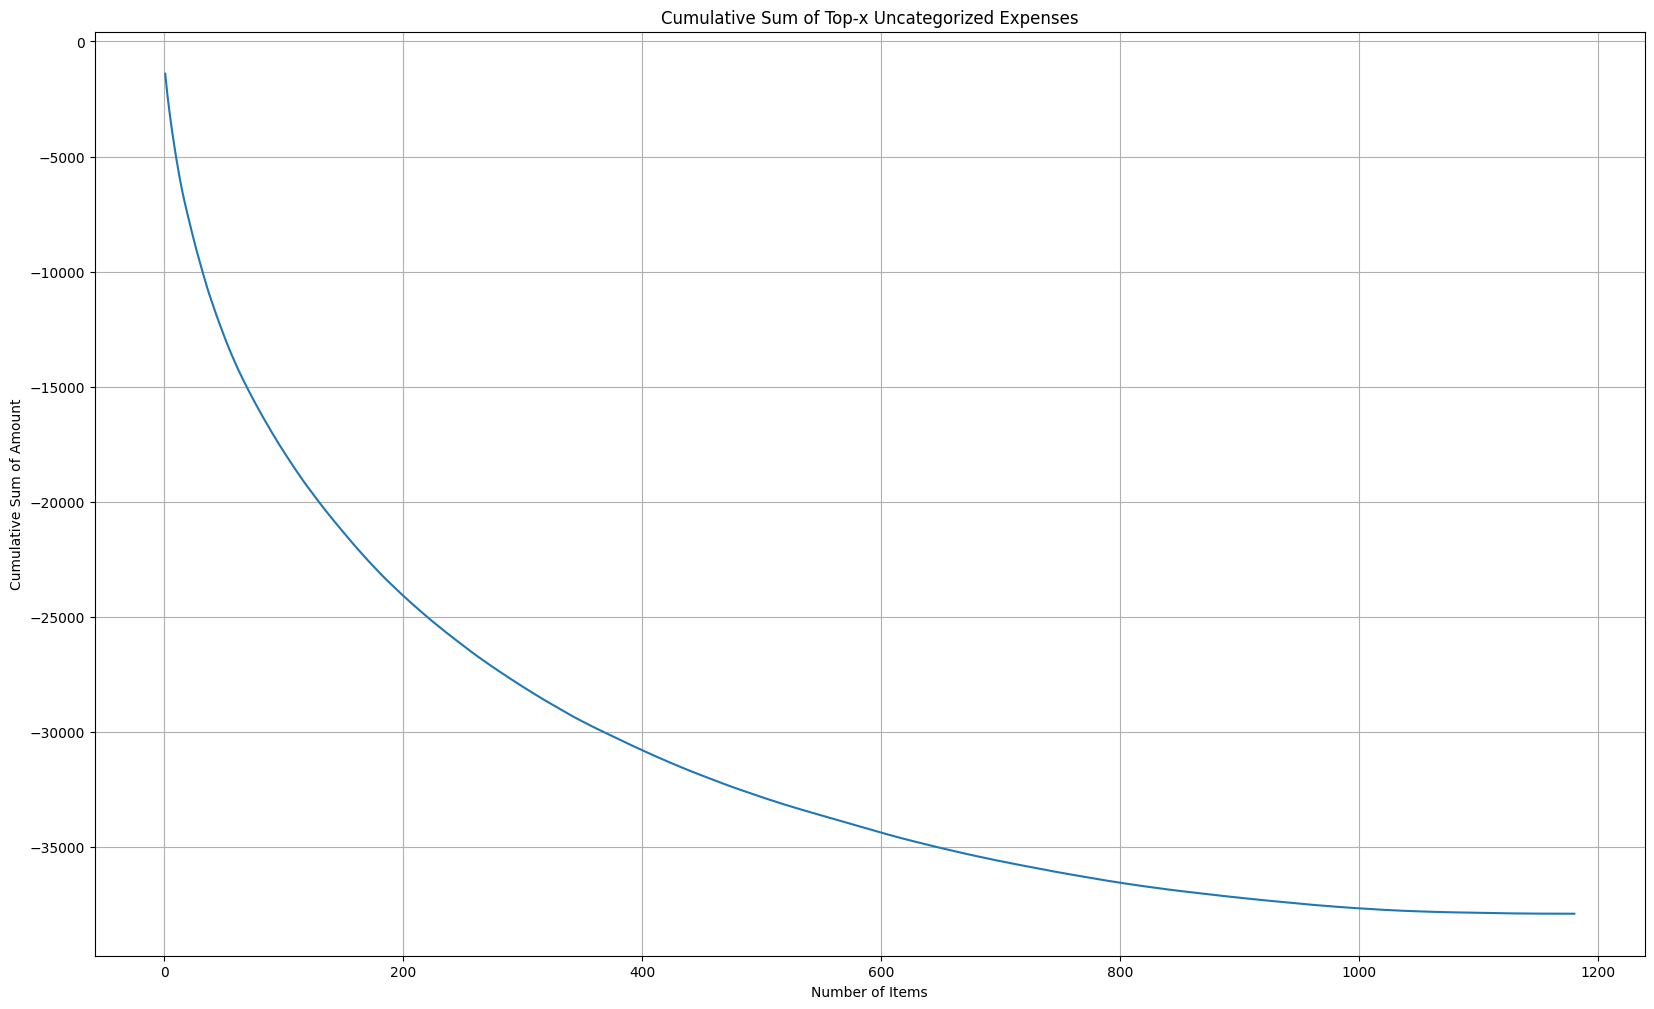

In [4]:
import matplotlib.pyplot as plt

# Calculate the cumulative sum of the amounts
filtered_df = filtered_df.sort_values(by='amount', ascending=True)
filtered_df['cumulative_sum'] = filtered_df['amount'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(20, 12))
plt.plot(range(1, len(filtered_df) + 1), filtered_df['cumulative_sum'])
plt.xlabel('Number of Items')
plt.ylabel('Cumulative Sum of Amount')
plt.title('Cumulative Sum of Top-x Uncategorized Expenses')
plt.grid(True)
plt.show()

In [39]:
# Gesamteinnahmen 2024
income_df = pc.loc[
    (pc.book_date.dt.year == 2024) &
    (pc['cat'].isin(['einnahmen::gehalt::andreas', 'einnahmen::gehalt::gesa', 'einnahmen::dividende']))
    ]
income_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
5664,giro,2024-01-02,2024-01-02,Andreas Profous,Gutschrift,Smartbroker,312.62,3320.50,NaN,einnahmen::dividende
5698,giro,2024-01-03,2024-01-03,ANDREAS EDMOND PROFOUS,Gutschrift,gehalt,3000.00,4910.55,NaN,einnahmen::gehalt::andreas
5699,giro,2024-01-03,2024-01-03,Andreas Profous,Gutschrift,Smartbroker,140.22,4591.18,NaN,einnahmen::dividende
5789,giro,2024-01-16,2024-01-16,Andreas Profous,Gutschrift,Smartbroker,67.03,3592.68,NaN,einnahmen::dividende
5790,giro,2024-01-16,2024-01-16,Andreas Profous,Gutschrift,Smartbroker,35.34,3525.65,NaN,einnahmen::dividende
...,...,...,...,...,...,...,...,...,...,...
8476,giro,2024-12-16,2024-12-13,NaN,Zins / Dividende WP,Zins/Dividende ISIN LU2573966905 MUL-AMUND,43.44,3190.81,NaN,einnahmen::dividende
8532,giro,2024-12-20,2024-12-20,Andreas Profous,Gutschrift,Smartbroker,384.38,3595.78,NaN,einnahmen::dividende
8533,giro,2024-12-20,2024-12-20,Andreas Profous,Gutschrift,Smartbroker,351.21,3211.40,NaN,einnahmen::dividende
8556,gesa,2024-12-27,2024-12-27,Technische Universitat Berlin,Gehalt/Rente,/FOR/Lohn/Gehalt 08141600/202501,5143.06,6366.56,NaN,einnahmen::gehalt::gesa


In [42]:
## Einkommensuebersicht 2024
def generate_income_overview(income_df: pd.DataFrame) -> pd.DataFrame:
    # Sum by category
    category_sum = income_df.groupby('cat')['amount'].sum()

    # Overall sum
    overall_sum = income_df['amount'].sum()

    # Combine results into a DataFrame
    overview_df = category_sum.reset_index().rename(columns={'amount': 'category_sum'})
    overview_df.loc[len(overview_df)] = ['Overall Sum', overall_sum]

    return overview_df
# Generate the overview
income_overview_df = generate_income_overview(income_df)
income_overview_df

,cat,category_sum
0,einnahmen::dividende,2874.91
1,einnahmen::gehalt::andreas,81600.00
2,einnahmen::gehalt::gesa,66188.70
3,Overall Sum,150663.61


In [4]:
# Filter für Ausgaben im Jahr 2024
expenses_df = pc.loc[
    (pc.book_date.dt.year == 2024) &  # Nur Buchungen aus dem Jahr 2024
    (~pc['cat'].str.startswith('intern', na=False)) &  # "intern"-Kategorie ausschließen
    (~pc['cat'].str.startswith('einnahmen', na=False)) &  # "einnahmen"-Kategorie ausschließen
    (pc['transfer_category'].isna()) &  # transfer_category muss NaN sein
    (pc['account'].isin(['giro', 'common', 'gesa']))  # Nur bestimmte Konten berücksichtigen
    ]

print(expenses_df['amount'].sum())
expenses_df

-122124.07


,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
5640,common,2024-01-02,2024-01-02,ASSPARIO GmbH,Lastschrift,BCL137832 VNA2361102-15 ass-101-001 286 12.23-...,-68.77,2474.40,NaN,versicherung::haftpflicht
5643,common,2024-01-02,2024-01-02,Andreas Profous Gesa Geisler,Lastschrift,Rechnung Darl.-Leistung 6070166475 Tilgung 877...,-1038.34,1267.06,NaN,wohnen::rate
5644,common,2024-01-02,2024-01-02,Erika Tribbioli,Dauerauftrag / Terminueberweisung,"Teatro, Paula Profous, 5d",-45.00,2543.17,NaN,kinder::theater
5645,common,2024-01-02,2024-01-02,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Sprachfoerderung V ormonat,-45.00,2305.40,NaN,kinder::schulekita
5646,common,2024-01-02,2024-01-02,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Sprachfoerderung V ormonat,-20.00,2350.40,NaN,kinder::schulekita
...,...,...,...,...,...,...,...,...,...,...
8585,giro,2024-12-30,2024-12-30,Hanseatic Bank,Lastschrift,Kartenabrechnung 12/2024 Hanseatic Bank,-24.00,10236.13,NaN,NaN
8586,giro,2024-12-30,2024-12-30,VISA AMZN DIGITAL*7Q1LO9RQ5,Lastschrift,NR XXXX 0014 LUXEMBOURG LU KAUFUMSATZ 26.12 16...,-16.99,10216.15,NaN,NaN
8587,giro,2024-12-30,2024-12-30,VISA APPLE.COM BILL,Lastschrift,NR XXXX 0014 08006645451 IE KAUFUMSATZ 25.12 0...,-0.99,10213.24,NaN,NaN
8588,giro,2024-12-30,2024-12-30,VISA APPLE.COM BILL,Lastschrift,NR XXXX 0014 08006645451 IE KAUFUMSATZ 25.12 1...,-1.92,10214.23,NaN,NaN


In [5]:
# Ausgaben nach Kategorie, Betragstyp und Konto gruppieren
def generate_expense_overview(expenses_df: pd.DataFrame) -> pd.DataFrame:
    # Replace NaN in 'cat' with 'Uncategorized'
    expenses_df['cat'] = expenses_df['cat'].fillna('Uncategorized')

    # Sum by category and account
    category_account_sum = expenses_df.groupby(['cat', 'account'])['amount'].sum().unstack(fill_value=0)

    # Sum by category across all accounts
    category_sum = expenses_df.groupby('cat')['amount'].sum()

    # Overall sum across all accounts
    overall_sum = expenses_df['amount'].sum()

    # Combine results into a DataFrame
    overview_df = category_sum.reset_index().rename(columns={'amount': 'category_sum'})
    overview_df['giro'] = overview_df['cat'].map(category_account_sum.get('giro', {}))
    overview_df['gesa'] = overview_df['cat'].map(category_account_sum.get('gesa', {}))
    overview_df['common'] = overview_df['cat'].map(category_account_sum.get('common', {}))

    # Add overall sum as a final row
    overall_row = pd.DataFrame([{
        'cat': 'Overall Sum',
        'category_sum': overall_sum,
        'giro': category_account_sum.loc[:, 'giro'].sum() if 'giro' in category_account_sum else 0,
        'gesa': category_account_sum.loc[:, 'gesa'].sum() if 'gesa' in category_account_sum else 0,
        'common': category_account_sum.loc[:, 'common'].sum() if 'common' in category_account_sum else 0,
    }])

    overview_df = pd.concat([overview_df, overall_row], ignore_index=True)

    return overview_df

# Generate the overview
expense_overview_df = generate_expense_overview(expenses_df)
expense_overview_df

/var/folders/s6/f25gt9z13js7h0gph573x98m0000gn/T/ipykernel_26877/3560591906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses_df['cat'] = expenses_df['cat'].fillna('Uncategorized')


,cat,category_sum,giro,gesa,common
0,Uncategorized,-26006.63,-6090.22,-17015.94,-2900.47
1,anwalt::centurion,-1642.20,-1642.20,0.00,0.00
2,bargeld,-4759.41,-2240.00,-2519.41,0.00
3,einkaufen,-12274.43,-4754.23,-4940.10,-2580.10
4,freizeit,-37.50,0.00,-37.50,0.00
5,freizeit::buch,-1271.29,-82.50,-1027.59,-161.20
6,freizeit::sport,-1552.70,-1042.70,0.00,-510.00
7,gesa::arbeit::software,-749.88,0.00,-749.88,0.00
8,gesa::dienstreise::unterkunft,-2980.90,0.00,-2980.90,0.00
9,gesa::friseur,-451.00,0.00,-451.00,0.00


In [35]:
pc[(pc.account == "giro") & (pc.amount > 0) & (pc.book_date.dt.year == 2024)]

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
5663,giro,2024-01-02,2024-01-02,Andreas Profous,Gutschrift,Ausgleich,1000.00,3007.88,NaN,intern
5664,giro,2024-01-02,2024-01-02,Andreas Profous,Gutschrift,Smartbroker,312.62,3320.50,NaN,intern
5698,giro,2024-01-03,2024-01-03,ANDREAS EDMOND PROFOUS,Gutschrift,gehalt,3000.00,4910.55,NaN,einnahmen::gehalt::andreas
5699,giro,2024-01-03,2024-01-03,Andreas Profous,Gutschrift,Smartbroker,140.22,4591.18,NaN,intern
5739,giro,2024-01-09,2024-01-08,VISA WWW ZALANDO DE,Gutschrift,NR XXXX 0014 GUTSCHRIFTSBELEG 14.12,123.85,4115.52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8529,giro,2024-12-19,2024-12-19,Andreas Profous,Gutschrift,Handy,1000.00,2877.47,NaN,intern
8532,giro,2024-12-20,2024-12-20,Andreas Profous,Gutschrift,Smartbroker,384.38,3595.78,NaN,intern
8533,giro,2024-12-20,2024-12-20,Andreas Profous,Gutschrift,Smartbroker,351.21,3211.40,NaN,intern
8535,giro,2024-12-20,2024-12-20,NATI POLTRI MARIA LUDOVICA,Gutschrift,libro,30.00,2907.47,NaN,NaN


In [3]:
df['book_date'].min()
df = pc
filtered_df = df[
    df['party'].str.contains('KNH|zirngibl', case=False, na=False) |
    df['purpose'].str.contains('KNH|zirngibl', case=False, na=False)
    ]
filtered_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
2467,giro,2022-09-05,2022-09-05,ANDREAS EDMOND PROFOUS,Gutschrift,Zirngibl,2000.00,2889.44,NaN,intern
2468,giro,2022-09-05,2022-09-05,zirngibl,Überweisung,"AktNr 050397-18, Rechnungsnummer 2022101077, R...",-1965.33,889.44,NaN,anwalt::centurion
4295,giro,2023-07-04,2023-07-04,KNH Rechtsanwaelte,Überweisung,Rg.-Nr. 1216/23 Rechnung vom 24. Mai 2023,-1256.64,7624.49,NaN,anwalt::centurion
6846,giro,2024-06-03,2024-06-03,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 919/24 Rechnung vom 2.5.2024,-142.80,2070.23,NaN,anwalt::centurion
6853,giro,2024-06-04,2024-06-04,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 1156/24 Rechnung vom 04.06.2024,-242.76,1827.47,NaN,anwalt::centurion
7250,giro,2024-09-02,2024-09-02,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 1691/24 vom 21.8.2024,-285.60,4730.75,NaN,anwalt::centurion
7550,giro,2024-11-04,2024-11-04,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 2061/24 vom 09.10.2024,-228.48,3130.48,NaN,anwalt::centurion


In [9]:
df['book_date'].min()

Timestamp('2021-04-12 00:00:00')

In [7]:
filtered_df = df[
    df['cat'].str.startswith('anwalt', na=False) |
    df['purpose'].str.contains('luig', case=False, na=False) |
    df['party'].str.contains('liu', case=False, na=False)
    ]
filtered_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
2339,giro,2022-07-27,2022-07-27,Uwe Weber,Überweisung,Anteil Fr. Luig Vergleich,-69.01,5452.42,NaN,anwalt::centurion
2468,giro,2022-09-05,2022-09-05,zirngibl,Überweisung,"AktNr 050397-18, Rechnungsnummer 2022101077, R...",-1965.33,889.44,NaN,anwalt::centurion
4295,giro,2023-07-04,2023-07-04,KNH Rechtsanwaelte,Überweisung,Rg.-Nr. 1216/23 Rechnung vom 24. Mai 2023,-1256.64,7624.49,NaN,anwalt::centurion
4669,giro,2023-08-28,2023-08-28,Kosteneinziehungsstelle der Justiz,Überweisung,Kassenzeichen 1230908667003,-1130.00,2400.64,NaN,anwalt::centurion
4670,giro,2023-08-28,2023-08-28,Pietz Rechtsanwaelte,Überweisung,Rechnungsnummer 2023000761 AZ 193/000263-16/ng,-691.49,1709.15,NaN,anwalt::centurion
6846,giro,2024-06-03,2024-06-03,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 919/24 Rechnung vom 2.5.2024,-142.80,2070.23,NaN,anwalt::centurion
6853,giro,2024-06-04,2024-06-04,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 1156/24 Rechnung vom 04.06.2024,-242.76,1827.47,NaN,anwalt::centurion
7250,giro,2024-09-02,2024-09-02,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 1691/24 vom 21.8.2024,-285.60,4730.75,NaN,anwalt::centurion
7550,giro,2024-11-04,2024-11-04,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 2061/24 vom 09.10.2024,-228.48,3130.48,NaN,anwalt::centurion


In [5]:
import datetime
df = pc.loc[(pc.book_date.dt.year == 2024) & (pc.transfer_category.isna())]
df = df.copy()
df.loc[df['amount'] > 0, 'amount_type'] = 'Gutschrift'
df.loc[df['amount'] <= 0, 'amount_type'] = 'Abbuchung'
cols = ['account', 'book_date', 'party', 'purpose', 'amount', 'cat']
df = df.loc[(df['amount_type'] == 'Abbuchung') & (df['account'] == 'giro')][cols].sort_values(by='amount', ascending=True)
filtered_df = df.loc[(pc.cat.isna())]
filtered_df

,account,book_date,party,purpose,amount,cat
7155,giro,2024-07-08,VISA MEDIA MARKT,NR XXXX 0014 INGOLSTADT DE KAUFUMSATZ 04.07 14...,-1452.90,NaN
7869,giro,2024-09-30,Hanseatic Bank,Kartenabrechnung 09/2024 Hanseatic Bank,-840.38,NaN
6710,giro,2024-05-14,easyJet by Adyen,easyJet easyJet K7FD29N 892823,-727.71,NaN
7417,giro,2024-08-06,VISA WWW.AUTOEUROPE.DE,NR XXXX 0014 MUNICH DE KAUFUMSATZ 02.08 720.24...,-720.24,NaN
6041,giro,2024-02-15,easyJet by Adyen,easyJet easyJet K6W3WLT 580598,-695.15,NaN
...,...,...,...,...,...,...
5661,giro,2024-01-02,VISA BASLER MUENSTER,VISA 4546 XXXX XXXX 0014 AUSLANDSEINSATZENTGEL...,-0.26,NaN
5662,giro,2024-01-02,VISA SUMUP *UFF EM BACH GM,VISA 4546 XXXX XXXX 0014 AUSLANDSEINSATZENTGEL...,-0.13,NaN
7543,giro,2024-08-23,VISA AIMO PARK ATOS,VISA 4546 XXXX XXXX 0014 AUSLANDSEINSATZENTGEL...,-0.10,NaN
7542,giro,2024-08-23,VISA AIMO PARK ATOS,VISA 4546 XXXX XXXX 0014 AUSLANDSEINSATZENTGEL...,-0.10,NaN


NameError: name 'df' is not defined

In [ ]:
da.loc[(pc.book_date.dt.month) == 9]

In [9]:
## Finden von nicht-kategorisierten Abbuchungen auf den Konten 'giro', 'gesa' und 'common' im Jahr 2024

# Kopie des DataFrames erstellen
df = pc.loc[(pc.book_date.dt.year == 2024) & (pc.transfer_category.isna())]
df = df.copy()

# 'amount_type' setzen basierend auf dem Betrag
df.loc[df['amount'] > 0, 'amount_type'] = 'Gutschrift'
df.loc[df['amount'] <= 0, 'amount_type'] = 'Abbuchung'

# Relevante Spalten auswählen
cols = ['account', 'book_date', 'party', 'purpose', 'amount', 'cat']

# Filter für Abbuchungen und die Konten 'giro' und 'common'
df = df.loc[
    (df['amount_type'] == 'Abbuchung') & (df['account'].isin(['giro', 'common', 'gesa']))
    ][cols].sort_values(by='amount', ascending=True)

# Nur Einträge ohne Kategorie anzeigen
filtered_df = df.loc[df['cat'].isna()]

filtered_df

,account,book_date,party,purpose,amount,cat
6880,gesa,2024-06-04,VISA AVOCADO STORE GMBH,NR XXXX 5021 HAMBURG DE KAUFUMSATZ 02.06 1402....,-1402.69,NaN
6408,gesa,2024-04-09,VISA SCHUHHAUS POTTHOFF,NR XXXX 5021 GUETERSLOH KAUFUMSATZ 05.04 14440...,-514.34,NaN
6640,gesa,2024-05-07,PayPal Europe S.a.r.l. et Cie S.C.A,"1034161056724/PP.7941.PP/. DB Vertr ieb GmbH, ...",-492.10,NaN
6089,gesa,2024-02-22,Waschbaer GmbH,K. 040240021 A. 102346415,-426.44,NaN
6642,gesa,2024-05-07,VISA APOTHEKE AM VIKT-LUISE,NR XXXX 5021 BERLIN KAUFUMSATZ 04.05 094907 AR...,-402.76,NaN
...,...,...,...,...,...,...
6333,gesa,2024-03-28,NaN,NaN,-0.06,NaN
7511,gesa,2024-08-20,VISA PARKERING KBH NV-R,VISA 4546 XXXX XXXX 5021 AUSLANDSEINSATZENTGEL...,-0.04,NaN
7539,gesa,2024-08-23,VISA JONES KOEKSHOERNA AB,VISA 4546 XXXX XXXX 5021 AUSLANDSEINSATZENTGEL...,-0.04,NaN
6327,common,2024-03-28,NaN,NaN,-0.03,NaN


In [ ]:
da.groupby(['cat', 'amount_type']).sum().reset_index()

In [ ]:
ausgaben = da[~((da['cat'].astype(str).str.startswith('intern')) | (da['cat'].astype(str).str.startswith('wohnen')))]
ausgaben['amount'].sum()

In [ ]:
ausgaben.groupby(['cat', 'amount_type']).sum().reset_index()

In [7]:
df = pc[(pc.account == 'common') & (pc.book_date > datetime.datetime(2023, 2, 1, 0,0,0)) & (pc.book_date < datetime.datetime(2024, 2, 1, 0,0,0))]
filtered_df = df[df['cat'] == 'wohnen::putzen']
filtered_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
3337,common,2023-02-13,2023-02-13,INES BORNEMANN,Lastschrift,Rg.Nr.27924 Kd.Nr. 2091 Haushalthil fe Januar ...,-278.46,-80.35,NaN,wohnen::putzen
3502,common,2023-03-10,2023-03-10,INES BORNEMANN,Lastschrift,Rg.Nr.28019 Kd.Nr. 2091 Haushalthil fe Februar...,-371.28,-78.78,NaN,wohnen::putzen
3900,common,2023-05-10,2023-05-10,INES BORNEMANN,Lastschrift,Rg.Nr.28115 Kd.Nr. 2091 Haushalthil fe Marz AS...,-465.65,295.09,NaN,wohnen::putzen
3931,common,2023-05-15,2023-05-15,INES BORNEMANN,Lastschrift,Rg.Nr.28203 Kd.Nr. 2091 Haushalthil fe April A...,-278.46,430.05,NaN,wohnen::putzen
4111,common,2023-06-08,2023-06-08,INES BORNEMANN,Lastschrift,Rg.Nr.28285 Kd.Nr. 2091 Haushalthil fe Mai ASL...,-371.28,-47.18,NaN,wohnen::putzen
4365,common,2023-07-12,2023-07-12,INES BORNEMANN,Lastschrift,Rg.Nr.28376 Kd.Nr. 2091 Haushalthil fe Juni AS...,-464.10,73.56,NaN,wohnen::putzen
4547,common,2023-08-09,2023-08-09,INES BORNEMANN,Lastschrift,Rg.Nr.28455 Kd.Nr. 2091 Haushalthil fe Juli AS...,-278.46,-237.85,NaN,wohnen::putzen
4775,common,2023-09-08,2023-09-08,INES BORNEMANN,Lastschrift,Rg.Nr.28542 Kd.Nr. 2091 Haushalthil fe August ...,-278.46,-135.84,NaN,wohnen::putzen
5018,common,2023-10-12,2023-10-12,INES BORNEMANN,Lastschrift,Rg.Nr.28649 Kd.Nr. 2091 Haushalthil fe Septemb...,-464.72,132.45,NaN,wohnen::putzen
5240,common,2023-11-14,2023-11-14,INES BORNEMANN,Lastschrift,Rg.Nr.28736 Kd.Nr. 2091 Haushalthil fe Oktober...,-371.28,714.38,NaN,wohnen::putzen


In [3]:
df = pc
filtered_df = df[df['party'].str.contains('KNH', case=False, na=False)]
filtered_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
4295,giro,2023-07-04,2023-07-04,KNH Rechtsanwaelte,Überweisung,Rg.-Nr. 1216/23 Rechnung vom 24. Mai 2023,-1256.64,7624.49,NaN,anwalt::centurion
6815,giro,2024-06-03,2024-06-03,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 919/24 Rechnung vom 2.5.2024,-142.80,2070.23,NaN,anwalt::centurion
6821,giro,2024-06-04,2024-06-04,KNH RECHTSANWAELTE,Überweisung,Rg.-Nr. 1156/24 Rechnung vom 04.06.2024,-242.76,1827.47,NaN,anwalt::centurion


In [37]:
df = pc[(pc.account == 'giro') & (pc.book_date > datetime.datetime(2023, 1, 1, 0,0,0)) & (pc.book_date < datetime.datetime(2024, 1, 1, 0,0,0))]
filtered_df = df[df['party'].str.contains('congstar', case=False, na=False)]['amount'].sum()
filtered_df

-274.23

In [ ]:
pc[(pc.account == 'common') & (pc.cat == 'wohnen::putzen')]

In [ ]:
putzdf = pc[(pc.account == 'common') & (pc.cat == 'wohnen::putzen')]

In [ ]:
putzdf.shape

In [ ]:
putzdf.amount.mean()

In [ ]:
import pandas as pd
df.groupby(pd.Grouper('M')).sum()

In [ ]:
df.resample('M', on='book_date')['amount'].sum().mean()

In [3]:
df = pc[(pc.account == 'common') & (pc['party'].str.contains('Europa', case=False, na=False))]

In [4]:
df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
1374,common,2022-01-04,2022-01-04,Europa unter einem Dach,Lastschrift,Re.Nr. 2021120118 vom 06.12.2021 Mi tgliedscha...,-24.0,1591.74,NaN,NaN
2930,common,2022-12-14,2022-12-14,Europa unter einem Dach,Lastschrift,Re.Nr. 2022120090 vom 04.12.2022 Mi tglieds. F...,-24.0,855.24,NaN,NaN
3836,common,2023-05-03,2023-05-03,Europa unter einem Dach Forderve rein Finow-Gr...,Lastschrift,4D Beitrag fuer die Sprachfoerderun g April 2023,-20.0,1243.35,NaN,NaN
3942,common,2023-05-16,2023-05-16,Europa unter einem Dach Forderve rein Finow-Gr...,Lastschrift,1C Beitrag fuer die Sprachfoerderun g April 2023,-45.0,373.05,NaN,NaN
3943,common,2023-05-16,2023-05-16,Europa unter einem Dach Forderve rein Finow-Gr...,Lastschrift,Beitrag fuer die Origami-AG Vormona t,-12.0,418.05,NaN,NaN
4080,common,2023-06-06,2023-06-06,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Sprachfoerderung V ormonat,-20.0,369.10,NaN,NaN
4099,common,2023-06-07,2023-06-07,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Sprachfoerderung V ormonat,-45.0,324.10,NaN,NaN
4113,common,2023-06-09,2023-06-09,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Hip Hop AG,-12.0,128.82,NaN,NaN
4114,common,2023-06-09,2023-06-09,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Origami-AG Vormona t,-12.0,140.82,NaN,NaN
4273,common,2023-07-03,2023-07-03,Europa unter einem Dach Foerderve rein Finow-G...,Lastschrift,Beitrag fuer die Origami-AG Vormona t,-12.0,1074.77,NaN,NaN


In [14]:
# Filter for expenses in the category 'mobilitaet::fahrrad' for the year 2024
bike_expenses_df = pc.loc[
    (pc.book_date.dt.year == 2024) &  # Only entries from 2024
    (pc['cat'] == 'mobilitaet::fahrrad') &  # Filter for the specific category
    (pc['amount'] < 0)  # Ensure only expenses (negative amounts)
    ]

bike_expenses_df

,account,book_date,valuta_date,party,book_text,purpose,amount,balance,transfer_category,cat
6497,giro,2024-04-19,2024-04-19,VISA BIKE MARKET CITY,Lastschrift,NR XXXX 0014 BERLIN KAUFUMSATZ 17.04 183949 AR...,-27.25,1408.91,NaN,mobilitaet::fahrrad
7198,giro,2024-07-12,2024-07-12,VISA BIKE MARKET CITY,Lastschrift,NR XXXX 0014 BERLIN DE KAUFUMSATZ 10.07 296.24...,-296.24,50456.47,NaN,mobilitaet::fahrrad
7243,giro,2024-07-19,2024-07-19,VISA BIKE MARKET CITY,Lastschrift,NR XXXX 0014 BERLIN DE KAUFUMSATZ 17.07 81.95 ...,-81.95,100222.38,NaN,mobilitaet::fahrrad
8038,gesa,2024-10-22,2024-10-22,VISA BIKE MARKET CITY,Lastschrift,NR XXXX 5021 BERLIN DE KAUFUMSATZ 19.10 52.50 ...,-52.50,1916.01,NaN,mobilitaet::fahrrad
